In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

In [37]:
#get data 
data = dict()
for file in os.listdir('data/navi'):
    if file.endswith(".csv"):
        data[file.replace(".csv","")] = pd.read_csv(os.path.join('data/navi', file),header=[1], sep=';', comment='#')

sdata = dict()
for file in os.listdir('data'):
    if file.endswith(".csv"):
        sdata[file.replace(".csv","")] = pd.read_csv(os.path.join('data', file),header=[1], sep=';', comment='#')

In [38]:
#add all data
dm = pd.DataFrame()
for i in data:
    dk=data[i]
    dm=dm.append(dk,ignore_index = True)

In [39]:
sdm = pd.DataFrame()
for i in sdata:
    sdk=sdata[i]
    sdm=sdm.append(sdk,ignore_index = True)

In [40]:
result = pd.merge(dm, sdm, on=["Datetime, dd/mm/yyyy hh:mm:ss", "Datetime, dd/mm/yyyy hh:mm:ss"])
result=result.sort_values(by='Datetime, dd/mm/yyyy hh:mm:ss')
result

,No,"Datetime, dd/mm/yyyy hh:mm:ss","GPS Time, hhmmssddmmyy",Status,Antenna,Longitude,Latitude,"Altitude, m","Speed, km/h",Course,...,"LSM AY, mg","LSM AZ, mg",LSM GX,LSM GY,LSM GZ,PM2.5,PM10,"EXT_TEMP, `C","BATT, V","VSYS, V"
132204,1,'05/08/2022 00:40:22,'022615080522,NOF,OPEN,"0,0000000","0,00000","0,0","0,00","0,0",...,"-25,3","555,5","700,0","1400,0","-770,0","5,1","16,9","-100,0","4,11","5,07"
132205,2,'05/08/2022 00:40:23,'022616080522,NOF,OPEN,"0,0000000","0,00000","0,0","0,00","0,0",...,"-74,2","810,4","-420,0","3500,0","11550,0","7,0","21,5","-100,0","4,11","5,06"
131758,1,'05/08/2022 00:40:30,'024553080522,NOF,OPEN,"0,0000000","0,00000","0,0","0,00","0,0",...,"-21,3","556,3","-1330,0","980,0","-770,0","13,8","44,3","-100,0","4,12","0,02"
131759,2,'05/08/2022 00:40:31,'024554080522,NOF,OPEN,"0,0000000","0,00000","0,0","0,00","0,0",...,"-17,1","812,4","-9380,0","4130,0","-12250,0","24,1","113,7","-100,0","4,11","0,03"
131760,3,'05/08/2022 00:40:32,'024555080522,NOF,OPEN,"0,0000000","0,00000","0,0","0,00","0,0",...,"-6,1","923,6","-5250,0","3220,0","70,0","27,4","116,9","-100,0","4,12","0,02"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,1045,'05/11/2022 10:45:48,'044558110522,FIX,OK,"65,7290649","40,68354","433,6","0,00","0,0",...,"-993,0","-136,0","0,0","0,0","0,0","3,8","10,0","-100,0","2,51","0,02"
1392,1046,'05/11/2022 10:45:49,'044559110522,FIX,OK,"65,7290649","40,68354","433,6","0,00","0,0",...,"-993,1","-136,3","0,0","0,0","0,0","3,8","10,0","-100,0","2,51","0,02"
1394,1047,'05/11/2022 10:45:49,'044600110522,FIX,OK,"65,7290649","40,68354","433,7","0,00","0,0",...,"-993,1","-136,3","0,0","0,0","0,0","3,8","10,0","-100,0","2,51","0,02"
1395,1047,'05/11/2022 10:45:49,'044600110522,FIX,OK,"65,7290649","40,68354","433,7","0,00","0,0",...,"-993,1","-136,8","0,0","0,0","0,0","3,7","10,0","-100,0","2,51","0,02"


In [41]:
rrdf=result.copy()


In [42]:
a=rrdf['Altitude, m'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['Altitude, m']=a


a=rrdf['Speed, km/h'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['Speed, km/h']=a

a=rrdf['Course'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['Course']=a

a=rrdf['HDC TEMP, `C'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['HDC TEMP, `C']=a

#a=rrdf['HDC HUM, %'].copy()
#a= a.str.replace(',', '.').astype(float)
#rrdf['HDC HUM, %']=a

a=rrdf['LPS PRESS, hPa'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['LPS PRESS, hPa']=a

a=rrdf['LPS TEMP, `C'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['LPS TEMP, `C']=a

a=rrdf['LSM TEMP, `C'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['LSM TEMP, `C']=a

a=rrdf['LSM AX, mg'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['LSM AX, mg']=a

a=rrdf['LSM AY, mg'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['LSM AY, mg']=a

a=rrdf['LSM AZ, mg'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['LSM AZ, mg']=a


a=rrdf['LSM GX'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['LSM GX']=a

a=rrdf['LSM GY'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['LSM GY']=a


a=rrdf['LSM GZ'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['LSM GZ']=a

a=rrdf['PM2.5'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['PM2.5']=a

a=rrdf['PM10'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['PM10']=a


a=rrdf['BATT, V'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['BATT, V']=a

a=rrdf['VSYS, V'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['VSYS, V']=a

a=rrdf['Longitude'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['Longitude']=a

a=rrdf['Latitude'].copy()
a= a.str.replace(',', '.').astype(float)
rrdf['Latitude']=a



In [43]:
rrdf.drop(rrdf[rrdf['GPS Time, hhmmssddmmyy']=="'"].index, inplace = True)
#rrdf.drop(rrdf[rrdf['Altitude, m']==0], inplace = True)


In [44]:
rrdf['Date GPS']=pd.to_datetime(rrdf['GPS Time, hhmmssddmmyy'].str.slice(7, 13)+" "+rrdf['GPS Time, hhmmssddmmyy'].str.slice(1, 7), 
                                dayfirst=True)
rrdf['Date GPS'] = rrdf['Date GPS'].dt.tz_localize('UTC').dt.tz_convert('Asia/Tashkent')

rrdf = rrdf.drop_duplicates(subset=["Date GPS"], keep="first")
rrdf=rrdf.drop(labels='No', axis=1)
rrdf=rrdf.drop(labels='EXT_TEMP, `C', axis=1)
rrdf=rrdf.sort_values(by='Date GPS')
rrdf.to_csv("FULLResults_v1.csv",index=False)

In [45]:
rrdf['Date GPS']=pd.to_datetime(rrdf['Date GPS'],dayfirst=True)
df_new = rrdf.set_index('Date GPS')
mask = (df_new.index > '2022-05-08 16:20:00') & (df_new.index <= '2022-05-11 09:40:00')

In [46]:
df_new=df_new.loc[mask]

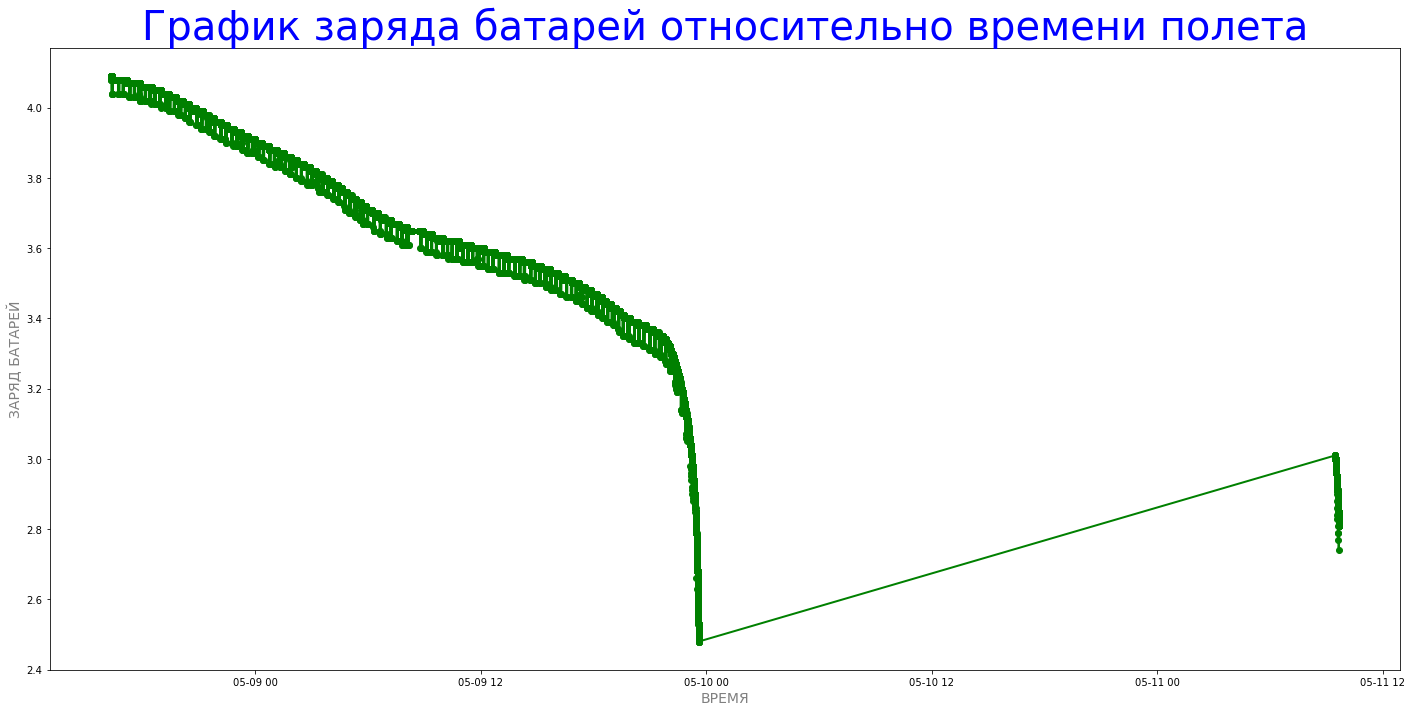

In [47]:
df=df_new.copy()

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
df['label'] = np.where((df['LSM TEMP, `C'] > -40) & (df['LSM TEMP, `C'] < 85), 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("ЗАРЯД БАТАРЕЙ",color="gray",fontsize=14)
    ax.set_xlabel("ВРЕМЯ",color="gray",fontsize=14)
    ax.plot(group.index, group['BATT, V'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="График заряда батарей относительно времени полета",fontsize=40,
          color="blue")
plt.show()

fig.savefig('00 batterRU.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

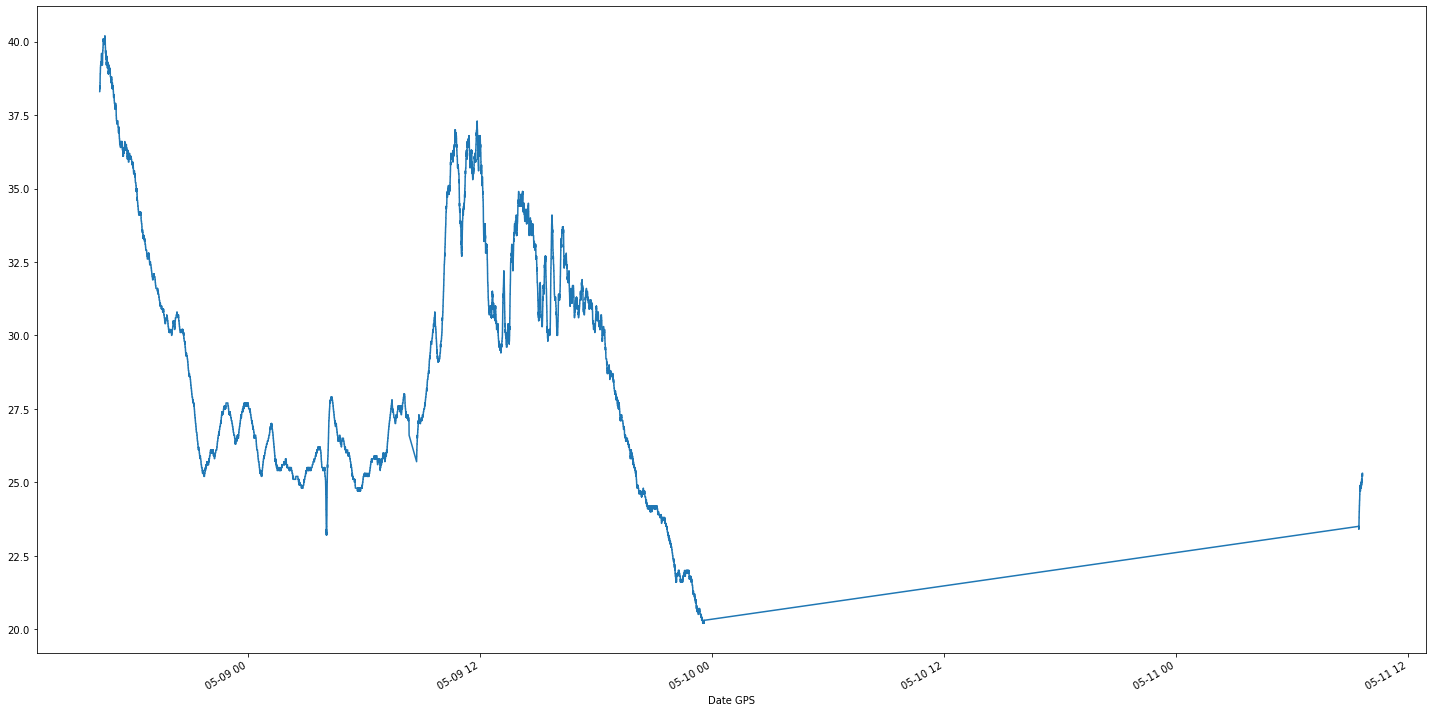

In [48]:
df_new['HDC TEMP, `C'].plot()